<a href="https://colab.research.google.com/github/ErickNoGit/Aulas-ML/blob/main/Aula_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import tensorflow as tf
import tensorflow.keras as keras

In [25]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass', 'female', 'age', 'fare']
titanic['female'] = titanic['sex'].map({'male' : 0, 'female' : 1})
titanic.dropna(subset=feature_names, inplace=True) #891 para 714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [26]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (535, 4)
Tamanho de X_test:  (179, 4)
Tamanho de y_train:  (535,)
Tamanho de y_test:  (179,)


In [27]:
model = keras.models.Sequential() #criar uma rede neural sequencial - feed fowrd
model.add(keras.layers.Dense(4, activation='relu', input_shape=X_train[0].shape))# primeira hidden
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation= 'sigmoid')) #output layer cm ativação sigmod (sigmode é um tipode função)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics = ['accuracy'])

In [29]:
batch_size = 32 # X_train 535 / 32 = 16.71 (então são 17 batches de 32)
epochs = 100

In [30]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 8.3008 - accuracy: 0.4766 - val_loss: 5.3875 - val_accuracy: 0.5140
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 8.3609 - accuracy: 0.4617 - val_loss: 4.9413 - val_accuracy: 0.4581
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 7.1352 - accuracy: 0.4729 - val_loss: 4.5011 - val_accuracy: 0.4581
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 6.5568 - accuracy: 0.4187 - val_loss: 4.0728 - val_accuracy: 0.4134
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 6.5265 - accuracy: 0.4280 - val_loss: 3.6403 - val_accuracy: 0.3911
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 5.4462 - accuracy: 0.4075 - val_loss: 3.2372 - val_accuracy: 0.3799
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 4.9091 - accuracy: 0.4131 - val_loss: 2.8670 - val_accuracy: 0.3240
Epoch 8/100


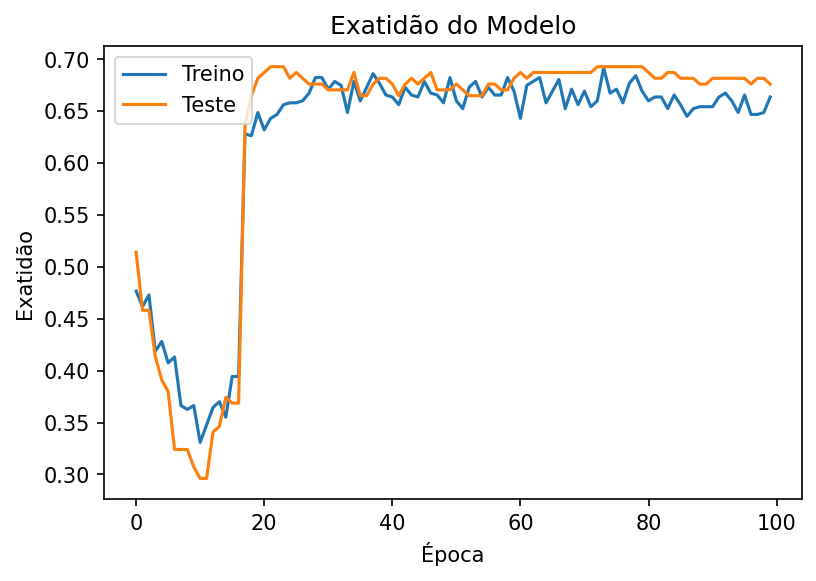

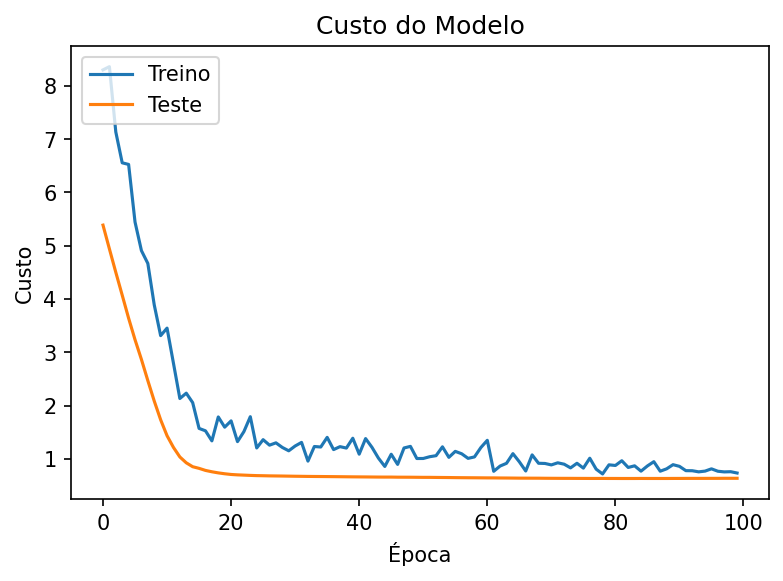

In [31]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 150

# plot acurácia de treino e validação
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exatidão do Modelo')
plt.ylabel('Exatidão')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc= 'upper left')
plt.show()

#plot cursto de treino e validação
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custo do Modelo')
plt.ylabel('Custo')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc= 'upper left')
plt.show()

In [32]:
(model.predict(X_test) > 0.5).astype('int32')

6/6 [==============================] - 0s 4ms/step


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    